In [72]:
import numpy as np
from operator import add


In [73]:
# Поворот вектора на угол а
def turn(cos_a, sin_a, v):
    result = [0,0]
    result[0] = cos_a*v[0] - sin_a*v[1]
    result[1] = sin_a*v[0] + cos_a*v[1]
    return result

In [74]:
# Поворот на углы, кратные Pi/3, всех векторов из списка
def turn60(U):
    new_U = []
    for v in U:
        for i in range(6):
            new_v = turn(1/2,np.sqrt(3)/2,v)
            #new_v = sp.simplify(new_v)
            flag = 0
            for u in new_U:
                if(abs(u[0] - new_v[0]) < 0.000001 and abs(u[1] - new_v[1]) < 0.000001):
                        flag = 1
            if(flag == 0):
                new_U.append(new_v)
            v = new_v
    return new_U

In [75]:
#Сумма Минковского одного мн-ва с собой k раз и двух множеств 1 раз
def Sum_Mink(U, k):
    result = U.copy()
    for i in range (k):
        new_result = []
        for u in result:
            for v in U:
                w = list(map(add, v, u))
                flag = 0
                for l in new_result:
                    if(abs(l[0] - w[0]) < 0.000001 and abs(l[1] - w[1]) < 0.000001):
                        flag = 1
                if (flag == 0):
                    new_result.append(w)
        result = new_result.copy()
    return result

def Sum_Mink_2(U, V):
    result = []
    for u in U:
        for v in V:
            w = list(map(add, v, u))
            flag = 0
            for l in result:
                if(abs(l[0] - w[0]) < 0.000001 and abs(l[1] - w[1]) < 0.000001):
                    flag = 1
            if (flag == 0):
                result.append(w)
    return result

    

7
43


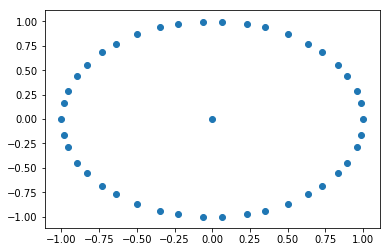

In [76]:
# Первые шаги, добавление векторов из веретена Мозера и поворот на углы, кратные Pi/3
U1 = [[1,0]]
U1.append(turn(5/6,np.sqrt(11)/6,[1,0]))
U1.append(turn(np.sqrt(11)/(2*np.sqrt(3)),1/(2*np.sqrt(3)),U1[1]))
U1.append(turn(5/6,-np.sqrt(11)/6,[1,0]))
U1.append(turn(np.sqrt(11)/(2*np.sqrt(3)),-1/(2*np.sqrt(3)),U1[3]))
U1.append(turn(np.sqrt(11)/(2*np.sqrt(3)),1/(2*np.sqrt(3)),[1,0]))
U1.append(turn(np.sqrt(11)/(2*np.sqrt(3)),-1/(2*np.sqrt(3)),[1,0]))
print(len(U1))
U1 = turn60(U1)
U1.append([0,0])
print(len(U1))
import matplotlib.pyplot as plt
x=[]
y=[]
for u in U1:
    x.append(u[0])
    y.append(u[1])
plt.scatter(x,y)
plt.show()

Построение V1939:

In [77]:
U1 = [[1,0]]
U1.append(turn(5/6,np.sqrt(11)/6,[1,0]))
#U1.append(turn(np.sqrt(11)/(2*np.sqrt(3)),1/(2*np.sqrt(3)),U1[1]))
U1.append(turn(5/6,-np.sqrt(11)/6,[1,0]))
#U1.append(turn(np.sqrt(11)/(2*np.sqrt(3)),-1/(2*np.sqrt(3)),U1[3]))
U1.append(turn(np.sqrt(11)/(2*np.sqrt(3)),1/(2*np.sqrt(3)),[1,0]))
U1.append(turn(np.sqrt(11)/(2*np.sqrt(3)),-1/(2*np.sqrt(3)),[1,0]))

U1 = turn60(U1)
U1.append([0,0])
V = Sum_Mink(U1,1);
print(len(V))
V0 = []
for v in V:
    if (v[0]**2 + v[1]**2 < 1.0000001):
        V0.append(v)
print(len(V0))
V0 = Sum_Mink_2(U1,V0)
print(len(V0))

count = 0;
Edges = []
index_u = 0
index_v = 0
for u in V0:
    index_v = 0
    index_u = index_u + 1;
    for v in V0:
        index_v = index_v + 1;
        if(index_v < index_u):
            if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.000001):
                Edges.append(['e', index_u, index_v])
                count = count + 1;
                    
print(count)   

451
151
1939
13374


Поворот:

In [51]:
Edges = []
count = 0;
index_u = 0
index_v = 0
for u in V0:
    index_v = 0
    index_u = index_u + 1;
    for v in V0:
        index_v = index_v + 1;
        if(index_v < index_u):
            if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.000001):
                Edges.append(['e', index_u, index_v])
                count = count + 1;
print(count)   
print(len(Edges))

13374
13374


In [71]:
G = []
        
for v in V0:
    G.append(v)

for v in V0:
    if (abs(v[0]) > 0.000001 or abs(v[1]) > 0.000001):
        u = turn(875000000.0/1000000000,484122918.0/1000000000,v)
        d = 1
        for k in V0:
            d = min(d, dist(k,u))
        if(d > 0.000000001):
                G.append(u)
print(len(G))
count = 0;
index_u = 0
index_v = 0
for u in G:
    index_v = 0
    index_u = index_u + 1;
    for v in G:
        index_v = index_v + 1;
        if(index_v < index_u):
            if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.00000001):
                Edges.append(['e', index_u, index_v])
                count = count + 1;
print(count)   
Edges = []
Edges1 = []
cnt1 = 0
cnt2 = 0
count = 0;
index_u = 0
index_v = 0
for u in G:
    index_v = 0
    index_u = index_u + 1;
    for v in G:
        index_v = index_v + 1;
        if(index_v < index_u):
            if((index_u > 1939) and (index_v <= 1939)):
                if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.0000000001):
                    count = count + 1;
                    if (abs(v[0]) > 0.000001 or abs(v[1]) > 0.000001):
                        Edges.append([e,index_v,index_u])
                        Edges1.append([v,u])
            if((index_u <= 1939) and (index_v <= 1939)):
                if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.0000000001):
                    #Edges.append(['e', index_u, index_v])
                    cnt1 = cnt1 + 1;
            if((index_u > 1939) and (index_v > 1939)):
                if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.0000000001):
                    #Edges.append(['e', index_u, index_v])
                    cnt2 = cnt2 + 1;
            
print(count) 
print(cnt1)
print(cnt2)
print(len(Edges))
print(len(Edges1))
#Print_Dist_Graph(G,0)

3877
26814
0
13374
0
0
0


In [95]:
G = []
        
for v in V0:
    G.append(v)
//u = turn(0.9775029678805327,0.21092166267301776,v)    
for v in V0:
    if (abs(v[0]) > 0.000001 or abs(v[1]) > 0.000001):
        u = turn(0.96916075342981478,-0.24642936921429173,v)
        G.append(u)
print(len(G))
count = 0;
index_u = 0
index_v = 0
for u in G:
    index_v = 0
    index_u = index_u + 1;
    for v in G:
        index_v = index_v + 1;
        if(index_v < index_u):
            if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.00000001):
                Edges.append(['e', index_u, index_v])
                count = count + 1;
print(count)   
Edges = []
Edges1 = []
cnt1 = 0
cnt2 = 0
count = 0;
index_u = 0
index_v = 0
for u in G:
    index_v = 0
    index_u = index_u + 1;
    for v in G:
        index_v = index_v + 1;
        if(index_v < index_u):
            if((index_u > 1939) and (index_v <= 1939)):
                if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.0000000001):
                    count = count + 1;
                    if (abs(v[0]) > 0.000001 or abs(v[1]) > 0.000001):
                        Edges.append([e,index_v,index_u])
                        Edges1.append([v,u])
            if((index_u <= 1939) and (index_v <= 1939)):
                if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.0000000001):
                    #Edges.append(['e', index_u, index_v])
                    cnt1 = cnt1 + 1;
            if((index_u > 1939) and (index_v > 1939)):
                if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.0000000001):
                    #Edges.append(['e', index_u, index_v])
                    cnt2 = cnt2 + 1;
            
print(count) 
print(cnt1)
print(cnt2)
print(len(Edges))
print(len(Edges1))
#Print_Dist_Graph(G,0)

3877
26796
78
13374
13344
48
48


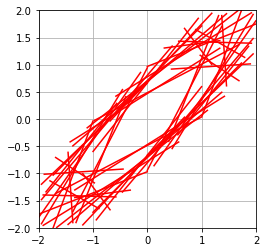

NameError: name 'Handle' is not defined

In [102]:
import pylab
import matplotlib.patches
import matplotlib.lines
import matplotlib.path
pylab.xlim (-2, 2)
pylab.ylim (-2, 2)
pylab.grid()
axes = pylab.gca()
axes.set_aspect("equal")
handle = open("Edges.txt", "w")
for e in Edges1:
    handle.write("%s\n" % e)
    line = matplotlib.lines.Line2D ([e[0][0], e[0][1]], [e[1][0], e[1][1]], color="red")
    axes.add_line (line)
pylab.show()
Handle.close()

In [44]:
for e in Edges:
    print(e)

['e', 1940, 1939]
['e', 1950, 1773]
['e', 1950, 1939]
['e', 1951, 1939]
['e', 1952, 1939]
['e', 1953, 1939]
['e', 1954, 1939]
['e', 1955, 1939]
['e', 1956, 1939]
['e', 1957, 1939]
['e', 1958, 1939]
['e', 1959, 1939]
['e', 1960, 2]
['e', 1960, 13]
['e', 1960, 30]
['e', 1960, 31]
['e', 1960, 32]
['e', 1960, 33]
['e', 1960, 34]
['e', 1960, 35]
['e', 1960, 36]
['e', 1960, 37]
['e', 1960, 38]
['e', 1960, 163]
['e', 1960, 178]
['e', 1960, 179]
['e', 1960, 180]
['e', 1960, 181]
['e', 1960, 276]
['e', 1960, 291]
['e', 1960, 292]
['e', 1960, 293]
['e', 1960, 294]
['e', 1960, 377]
['e', 1960, 378]
['e', 1960, 379]
['e', 1960, 380]
['e', 1960, 381]
['e', 1960, 497]
['e', 1960, 498]
['e', 1960, 499]
['e', 1960, 500]
['e', 1963, 1776]
['e', 2036, 1556]
['e', 2037, 1736]
['e', 2090, 1551]
['e', 2090, 1939]
['e', 2091, 1939]
['e', 2092, 1939]
['e', 2093, 1939]
['e', 2094, 1939]
['e', 2112, 1555]
['e', 2164, 1553]
['e', 2203, 1598]
['e', 2225, 1603]
['e', 2281, 1601]
['e', 2321, 1643]
['e', 2342, 1648

In [78]:
def dist(u,v):
    return (v[0]-u[0])**2 + (v[1]-u[1])**2
def len_(v):
    return v[0]**2 + v[1]**2
def angle(u,v):
    return (len_(v) + len_(u) - dist(u,v))/(2*np.sqrt(len_(v))*np.sqrt(len_(u)))
def angle1(u,v):
    return (len_(v) + len_(u) - 1)/(2*np.sqrt(len_(v))*np.sqrt(len_(u)))

In [79]:
Edges = []
count = 0;
index_u = 0
index_v = 0
for u in V0:
    index_v = 0
    index_u = index_u + 1;
    for v in V0:
        index_v = index_v + 1;
        if(index_v < index_u):
            if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.000001):
                Edges.append(['e', index_u, index_v])
                count = count + 1;
print(count)   
print(len(Edges))

13374
13374


In [39]:
cnt = 0
for v in V0:
    for u in V0:
        cos_a = angle(u,v)
        cos_y = angle1(u,v)
        if(cos_a**2 > 1 or cos_y**2 > 1):
            continue
        s = u[0]*v[1] - u[1]*v[0]
        if(s >= 0):
            print("Случай 1")
            cos_b = cos_a*cos_y-np.sqrt(1-cos_a**2)*np.sqrt(1-cos_y**2)
            sin_b = np.sqrt(1-cos_b**2)
        if (s < 0):
            if(cos_y < cos_a):
                print("Случай 2")
                cos_b = cos_a*cos_y + np.sqrt(1-cos_a**2)*np.sqrt(1-cos_y**2)
                sin_b = np.sqrt(1-cos_b**2)
            if(cos_y >= cos_a):
                print(["Случай 3",s,cos_y,cos_a])
                cos_b = cos_a*cos_y + np.sqrt(1-cos_a**2)*np.sqrt(1-cos_y**2)
                sin_b = -np.sqrt(1-cos_b**2)
        u1 = turn(cos_b,sin_b,u)
        print(dist(u1,v))
        G = []
        for v in V0
           G.append(v) 
        for m in V0:
            if(abs(m[0]) > 0.000001 or abs(m[1]) > 0.000001):
                h = turn(cos_b,sin_b,m)
                d = 1
                for k in V0:
                    d = min(d, dist(k,h))
                if(d > 0.000001):
                    G.append(h)
        count = 0;
        index_u = 0
        index_v = 0
        for u_ in G:
            index_v = 0
            index_u = index_u + 1;
            for v_ in G:
                index_v = index_v + 1;
                if(index_v < index_u):
                    if(abs(((v_[0]-u_[0])**2 + (v_[1]-u_[1])**2) - 1) < 0.00001):
                        #Edges.append(['e', index_u, index_v])
                        count = count + 1;
        print(count)                
        print(len(G))
        if(count >= 26750):
            cnt = cnt + 1
            Print_Dist_Graph(G,cnt)
            
            

Случай 1
1.0


KeyboardInterrupt: 

In [84]:
#Запись графов в файл
def Print_Dist_Graph(U, cnt):
    count = 0;
    Edges = []
    index_u = 0
    index_v = 0
    for u in U:
        index_v = 0
        index_u = index_u + 1;
        for v in U:
            index_v = index_v + 1;
            if(index_v < index_u):
                if(abs(((v[0]-u[0])**2 + (v[1]-u[1])**2) - 1) < 0.0000001):
                    Edges.append(['e', index_u, index_v])
                    count = count + 1;
                    #print(['e', index_u, index_v])
    print(cnt)
    handle = open("23.04.output" + str(cnt) + ".txt", "w")
    handle.write("%s" % "p edges ")
    handle.write("%s" % index_u)
    handle.write(" ")
    handle.write("%s\n" % len(Edges))
    for e in Edges:
        handle.write("%s " % "e")
        handle.write("%s " % e[1])
        handle.write("%s\n" % e[2])
    handle.close()
    print(count)
    return 0

In [101]:
Print_Dist_Graph(G)

26814


0

In [94]:
count = 0
d = {}
angles = []
index_u = 0
index_v = 0
for v in V0:
    for u in V0:
        cos_a = angle(u,v)
        cos_y = angle1(u,v)
        if(cos_a**2 > 1 or cos_y**2 > 1):
            continue
        s = u[0]*v[1] - u[1]*v[0]
        if(s >= 0):
            cos_b = cos_a*cos_y-np.sqrt(1-cos_a**2)*np.sqrt(1-cos_y**2)
            sin_b = np.sqrt(1-cos_b**2)
        if (s < 0):
            if(cos_y < cos_a):
                cos_b = cos_a*cos_y + np.sqrt(1-cos_a**2)*np.sqrt(1-cos_y**2)
                sin_b = np.sqrt(1-cos_b**2)
            if(cos_y >= cos_a):
                cos_b = cos_a*cos_y + np.sqrt(1-cos_a**2)*np.sqrt(1-cos_y**2)
                sin_b = -np.sqrt(1-cos_b**2)
        if(cos_b < np.sqrt(3)/2):
            continue
        cos_b1 = cos_b*1000000000
        cos_b1 = round(cos_b1)   
        if(cos_b1 == 977502968):
            print([cos_b,sin_b])
        cos_b = cos_b*1000000000
        cos_b = round(cos_b)
        sin_b = sin_b*1000000000
        sin_b = round(sin_b)
        if(d.get((cos_b,sin_b)) == None):
            d[(cos_b,sin_b)] = 1
            #print(len(d), cos_b, sin_b)
        else:
            d[(cos_b,sin_b)] = d.get((cos_b,sin_b)) + 1

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in sqrt


[0.9775029678805327, 0.21092166267301776]
[0.97750296788053281, 0.21092166267301724]


C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in sqrt


[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.97750296788053281, 0.21092166267301724]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.21092166267301776]
[0.9775029678805327, 0.2109216626

In [92]:
print(len(V0))
print(len(d))

1939
31847


In [14]:
cos_ = 7/8
sin_ = np.sqrt(15)/8
cos_ = cos_ * 1000000000
cos_ = round(cos_)
sin_ = sin_ * 1000000000
sin_ = round(sin_)
if(d.get((cos_,sin_)) == None):
    print("None")
else:
    print(d.get((cos_,sin_)))

76


In [83]:
angles =[]
for key,value in d.items():
    angles.append([key,value])
def sort_(a):
    return (a[1])
angles = sorted(angles, key = sort_, reverse = True)
for a in angles:
    print (a)

[(1000000000.0, 0.0), 12343]
[(957427108.0, 288675135.0), 7671]
[(957427108.0, -288675135.0), 7445]
[(895380221.0, 445302437.0), 3654]
[(895380221.0, -445302437.0), 3572]
[(985809036.0, 167870619.0), 1625]
[(985809036.0, -167870619.0), 1589]
[(977164836.0, -212482665.0), 984]
[(977164836.0, 212482665.0), 900]
[(911684397.0, 410891178.0), 834]
[(995178449.0, -98080861.0), 808]
[(995178449.0, 98080861.0), 772]
[(911684397.0, -410891178.0), 648]
[(992300368.0, -123854675.0), 593]
[(1000000000.0, 15.0), 590]
[(938748323.0, -344603521.0), 588]
[(992300368.0, 123854675.0), 581]
[(869601783.0, 493753724.0), 564]
[(938748323.0, 344603521.0), 552]
[(996902565.0, 78646528.0), 552]
[(869601783.0, -493753724.0), 552]
[(874225641.0, 485519854.0), 528]
[(996902565.0, -78646528.0), 516]
[(874225641.0, -485519854.0), 516]
[(928571429.0, 371153744.0), 492]
[(991485422.0, 130217736.0), 480]
[(945742711.0, -324916489.0), 456]
[(928571429.0, -371153744.0), 456]
[(981124330.0, 193377998.0), 444]
[(92449731

[(967130410.0, -254280887.0), 36]
[(901849632.0, -432050045.0), 36]
[(975631400.0, -219415978.0), 36]
[(876669379.0, -481093339.0), 36]
[(978226712.0, -207539153.0), 36]
[(967126144.0, 254297114.0), 36]
[(955185036.0, -296009370.0), 36]
[(998566851.0, -53518630.0), 36]
[(907377008.0, -420317697.0), 36]
[(999558991.0, 29695515.0), 36]
[(949069957.0, -315065416.0), 36]
[(979184745.0, -202971023.0), 36]
[(911168318.0, -412034339.0), 36]
[(975959767.0, 217950758.0), 36]
[(999184458.0, -40378449.0), 36]
[(980855464.0, -194737153.0), 36]
[(903834496.0, 427882231.0), 36]
[(975478354.0, 220095389.0), 36]
[(978744503.0, 205083393.0), 36]
[(882124468.0, -471016373.0), 36]
[(964045982.0, 265735479.0), 36]
[(989438772.0, 144951426.0), 36]
[(895796576.0, 444464278.0), 36]
[(972983253.0, -230875700.0), 36]
[(920711899.0, 390243000.0), 36]
[(968465844.0, -249146361.0), 36]
[(890582753.0, 454821240.0), 36]
[(933603732.0, -358307230.0), 36]
[(947589224.0, -319491255.0), 36]
[(993336643.0, -115248920.0)

[(954550038.0, -298050708.0), 36]
[(989802782.0, 142444563.0), 36]
[(951680805.0, -307088987.0), 36]
[(992329441.0, -123621522.0), 36]
[(966409913.0, 257005603.0), 36]
[(973962050.0, 226711107.0), 36]
[(982664289.0, 185393891.0), 36]
[(902213835.0, -431288994.0), 36]
[(995807912.0, 91469131.0), 36]
[(986957649.0, 160980121.0), 36]
[(867346799.0, 497704259.0), 36]
[(918368770.0, 395725664.0), 36]
[(994348035.0, -106169609.0), 36]
[(997517306.0, 70421763.0), 36]
[(928766293.0, -370665850.0), 36]
[(981445386.0, 191741893.0), 36]
[(932228945.0, -361869029.0), 36]
[(974774510.0, -223191968.0), 36]
[(993145866.0, -116881516.0), 36]
[(918104747.0, 396337828.0), 36]
[(918338564.0, 395795757.0), 36]
[(993949917.0, 109834250.0), 36]
[(881109637.0, -472912051.0), 36]
[(910376244.0, -413781457.0), 36]
[(956901759.0, 290411818.0), 36]
[(969002326.0, -247051597.0), 36]
[(889840608.0, 456271511.0), 36]
[(889220387.0, -457479074.0), 36]
[(983230181.0, -182368885.0), 36]
[(991077862.0, 133284178.0), 36

[(905471630.0, 424406795.0), 24]
[(993045827.0, 117728439.0), 24]
[(985158027.0, 171649825.0), 24]
[(875170020.0, 483815497.0), 24]
[(995313384.0, 96701954.0), 24]
[(980540593.0, -196316444.0), 24]
[(884493980.0, -466551604.0), 24]
[(998208616.0, 59829417.0), 24]
[(977766447.0, -209696863.0), 24]
[(980416588.0, -196934797.0), 24]
[(871431318.0, 490517540.0), 24]
[(978945188.0, 204123295.0), 24]
[(907724760.0, 419566157.0), 24]
[(997291909.0, -73544872.0), 24]
[(953825085.0, -300362626.0), 24]
[(957156525.0, -289571040.0), 24]
[(938180917.0, -346145298.0), 24]
[(902519678.0, -430648616.0), 24]
[(999965923.0, 8255498.0), 24]
[(901725779.0, -432308477.0), 24]
[(871895071.0, 489692746.0), 24]
[(957997416.0, 286776833.0), 24]
[(998362356.0, -57206703.0), 24]
[(936514095.0, -350629933.0), 24]
[(868568847.0, 495568521.0), 24]
[(961084674.0, 276253959.0), 24]
[(998220985.0, 59622686.0), 24]
[(999595427.0, -28442603.0), 24]
[(905910344.0, 423469538.0), 24]
[(969260130.0, 246038210.0), 24]
[(992

[(898101882.0, 439787459.0), 24]
[(990804620.0, 135300427.0), 24]
[(906975786.0, 421182767.0), 24]
[(978776992.0, -204928279.0), 24]
[(938349020.0, 345689335.0), 24]
[(879585582.0, 475740689.0), 24]
[(992065461.0, 125722400.0), 24]
[(988358087.0, 152145624.0), 24]
[(951885087.0, 306455188.0), 24]
[(972824843.0, 231542273.0), 24]
[(944526083.0, 328436415.0), 24]
[(928315155.0, 371794262.0), 24]
[(905837883.0, 423624514.0), 24]
[(955258409.0, 295772499.0), 24]
[(993872636.0, -110531368.0), 24]
[(972246113.0, 233960457.0), 24]
[(931427222.0, 363927645.0), 24]
[(909565332.0, 415560954.0), 24]
[(966066789.0, -258292391.0), 24]
[(903517786.0, -428550592.0), 24]
[(945938392.0, 324346354.0), 24]
[(886848357.0, -462060593.0), 24]
[(979916507.0, -199408221.0), 24]
[(983315187.0, -181909987.0), 24]
[(995496939.0, 94793690.0), 24]
[(989762867.0, -142721641.0), 24]
[(937724801.0, -347379041.0), 24]
[(973188926.0, 230007205.0), 24]
[(939476066.0, -342614538.0), 24]
[(975003760.0, 222188360.0), 24]
[

[(973709183.0, -227794703.0), 24]
[(999255078.0, 38591314.0), 24]
[(980965560.0, -194181797.0), 24]
[(913358838.0, -407155539.0), 24]
[(980393844.0, 197047989.0), 24]
[(995065396.0, 99221254.0), 24]
[(988927326.0, -148400616.0), 24]
[(996996858.0, 77442005.0), 24]
[(934722301.0, -355378980.0), 24]
[(998860420.0, -47726940.0), 24]
[(924104665.0, -382139463.0), 24]
[(955520553.0, -294924519.0), 24]
[(890877489.0, 454243656.0), 24]
[(996271944.0, 86268264.0), 24]
[(972430520.0, 233192803.0), 24]
[(904078546.0, 427366333.0), 24]
[(998155847.0, 60703426.0), 24]
[(921987011.0, -387220804.0), 24]
[(901305683.0, -433183639.0), 24]
[(901981032.0, 431775658.0), 24]
[(997808967.0, 66160902.0), 24]
[(993163167.0, 116734417.0), 24]
[(962464369.0, 271408068.0), 24]
[(967687086.0, 252154125.0), 24]
[(999581271.0, -28935846.0), 24]
[(999159397.0, 40993888.0), 24]
[(994993461.0, 99940040.0), 24]
[(954987868.0, 296644858.0), 24]
[(966078621.0, -258248133.0), 24]
[(997933357.0, 64257410.0), 24]
[(9401291

[(963915332.0, 266209000.0), 24]
[(945164031.0, -326596010.0), 24]
[(913637802.0, -406529171.0), 24]
[(975935037.0, -218061468.0), 24]
[(999868985.0, -16186827.0), 24]
[(981459561.0, 191669323.0), 24]
[(972365674.0, 233463051.0), 24]
[(999906889.0, -13646008.0), 24]
[(995762822.0, 91958694.0), 24]
[(950202303.0, -311633734.0), 24]
[(998082835.0, -61892278.0), 24]
[(999501122.0, 31583323.0), 24]
[(998384150.0, -56825067.0), 24]
[(866689180.0, -498848540.0), 24]
[(994558652.0, -104178155.0), 24]
[(889376834.0, 457174854.0), 24]
[(932843676.0, 360281385.0), 24]
[(896411487.0, 443222795.0), 24]
[(943429018.0, 331574560.0), 24]
[(932461212.0, 361270104.0), 24]
[(919940916.0, 392057026.0), 24]
[(925638670.0, 378408578.0), 24]
[(920976438.0, 389618274.0), 24]
[(896929012.0, 442174566.0), 24]
[(999389145.0, 34947626.0), 24]
[(946624828.0, -322337455.0), 24]
[(914143768.0, -405390147.0), 24]
[(962991051.0, 269533367.0), 24]
[(970662890.0, -240444494.0), 24]
[(989413235.0, -145125638.0), 24]
[(9

[(982193354.0, -187872871.0), 24]
[(897986563.0, 440022878.0), 24]
[(940361180.0, 340177676.0), 24]
[(888996161.0, 457914649.0), 24]
[(918289037.0, -395910652.0), 24]
[(992671443.0, -120844552.0), 24]
[(975062717.0, -221929489.0), 24]
[(989933748.0, -141531534.0), 24]
[(962014551.0, -272998175.0), 24]
[(991296090.0, 131651290.0), 24]
[(916634709.0, -399725919.0), 24]
[(919570313.0, -392925490.0), 24]
[(882898974.0, -469562990.0), 24]
[(931289310.0, 364280415.0), 24]
[(922858219.0, 385139854.0), 24]
[(934313352.0, 356452745.0), 24]
[(980334116.0, -197344929.0), 24]
[(988311494.0, 152447993.0), 24]
[(907653683.0, -419719897.0), 24]
[(892271093.0, 451500052.0), 24]
[(871268433.0, 490806802.0), 24]
[(907020553.0, 421086353.0), 24]
[(999959372.0, -9014120.0), 24]
[(971276599.0, 237953291.0), 24]
[(997913444.0, 64565925.0), 24]
[(974749276.0, 223302145.0), 24]
[(981516013.0, 191380032.0), 24]
[(959990362.0, 280033044.0), 24]
[(989536403.0, -144283430.0), 24]
[(881827239.0, -471572604.0), 24]

[(999886689.0, 15053540.0), 24]
[(878910019.0, 476987609.0), 24]
[(941662669.0, 336558193.0), 24]
[(909015978.0, 416761265.0), 24]
[(894269754.0, 447528331.0), 24]
[(999165938.0, -40834168.0), 24]
[(979115940.0, 203302670.0), 24]
[(928092064.0, 372350804.0), 24]
[(900654334.0, 434536272.0), 24]
[(927062532.0, -374906738.0), 24]
[(985554090.0, -169360964.0), 24]
[(963188677.0, 268826286.0), 24]
[(992007935.0, -126175497.0), 24]
[(983308846.0, 181944261.0), 24]
[(873589793.0, 486662998.0), 24]
[(952004671.0, 306083496.0), 24]
[(978380523.0, 206812842.0), 24]
[(992895660.0, 118988267.0), 24]
[(918935525.0, -394407785.0), 24]
[(996429760.0, -84425908.0), 24]
[(973734948.0, 227684541.0), 24]
[(932171932.0, -362015869.0), 24]
[(999683199.0, -25169439.0), 24]
[(982713667.0, 185131978.0), 24]
[(903350387.0, -428903343.0), 24]
[(892170589.0, -451698617.0), 24]
[(999516584.0, -31090179.0), 24]
[(896648975.0, 442742154.0), 24]
[(997410600.0, 71917275.0), 24]
[(944459909.0, 328626657.0), 24]
[(905

[(988416447.0, -151766028.0), 24]
[(998568717.0, 53483809.0), 24]
[(994855624.0, -101302945.0), 24]
[(979842883.0, -199769680.0), 24]
[(951306236.0, 308247378.0), 24]
[(999849714.0, -17336367.0), 24]
[(974564025.0, 224109263.0), 24]
[(995107943.0, 98793629.0), 24]
[(999614953.0, -27747899.0), 24]
[(971639826.0, 236465744.0), 24]
[(914667739.0, 404206541.0), 24]
[(972925012.0, 231121011.0), 24]
[(891923318.0, 452186681.0), 24]
[(954566455.0, 297998127.0), 24]
[(937645840.0, 347592116.0), 24]
[(988799276.0, -149251439.0), 24]
[(985731409.0, -168325840.0), 24]
[(994450951.0, -105201264.0), 24]
[(949481539.0, 313822891.0), 24]
[(907073801.0, 420971638.0), 24]
[(963689606.0, 267024987.0), 24]
[(995796677.0, 91591369.0), 24]
[(876307302.0, -481752542.0), 24]
[(979337924.0, -202230636.0), 24]
[(971518948.0, -236961883.0), 24]
[(950437070.0, 310916991.0), 24]
[(979993464.0, 199029671.0), 24]
[(995236527.0, 97489774.0), 24]
[(884945415.0, 465694763.0), 24]
[(949902547.0, 312546239.0), 24]
[(923

[(945690008.0, 325069853.0), 24]
[(984997622.0, -172567913.0), 24]
[(953834079.0, -300334064.0), 24]
[(982931146.0, -183973809.0), 24]
[(999190779.0, 40221733.0), 24]
[(899123739.0, -437694531.0), 24]
[(997077965.0, 76390658.0), 24]
[(947296294.0, 320358754.0), 24]
[(990541216.0, -137215518.0), 24]
[(910519727.0, 413465628.0), 24]
[(905013609.0, 425382614.0), 24]
[(908944664.0, 416916775.0), 24]
[(988108711.0, 153756869.0), 24]
[(975865389.0, -218372946.0), 24]
[(996816992.0, 79723805.0), 24]
[(991783997.0, 127923817.0), 24]
[(980088931.0, 198559029.0), 24]
[(892263784.0, -451514496.0), 24]
[(899478997.0, -436963997.0), 24]
[(912653996.0, -408733022.0), 24]
[(965622696.0, 259947704.0), 24]
[(951848496.0, 306568820.0), 24]
[(997674104.0, -68164379.0), 24]
[(979959616.0, 199196260.0), 24]
[(998807590.0, -48820056.0), 24]
[(940452706.0, -339924562.0), 24]
[(940296658.0, 340355983.0), 24]
[(898064562.0, 439863663.0), 24]
[(883500555.0, 468430112.0), 24]
[(993873845.0, 110520501.0), 24]
[(8

[(959516574.0, 281652169.0), 12]
[(944025788.0, -329871660.0), 12]
[(997188150.0, -74938604.0), 12]
[(996646633.0, 81825972.0), 12]
[(937470534.0, -348064647.0), 12]
[(986334882.0, -164752846.0), 12]
[(992541986.0, -121903261.0), 12]
[(934003628.0, -357263521.0), 12]
[(996596569.0, 82433479.0), 12]
[(998697486.0, 51022857.0), 12]
[(997610132.0, -69094313.0), 12]
[(910719608.0, -413025177.0), 12]
[(966735605.0, 255777775.0), 12]
[(983217181.0, 182438962.0), 12]
[(976586000.0, -215127368.0), 12]
[(994651070.0, -103292054.0), 12]
[(999999467.0, -1032320.0), 12]
[(970579873.0, -240779382.0), 12]
[(939888658.0, -341481056.0), 12]
[(905491189.0, -424365062.0), 12]
[(890473744.0, 455034626.0), 12]
[(963946520.0, 266096047.0), 12]
[(944350855.0, -328939906.0), 12]
[(999834751.0, 18178847.0), 12]
[(999501346.0, -31576256.0), 12]
[(999939215.0, 11025695.0), 12]
[(884428825.0, -466675105.0), 12]
[(885841507.0, -463987957.0), 12]
[(996601598.0, -82372656.0), 12]
[(961253752.0, -275665058.0), 12]
[

[(996512366.0, -83445217.0), 12]
[(994045678.0, -108964167.0), 12]
[(999675587.0, 25469978.0), 12]
[(874812086.0, -484462396.0), 12]
[(996868675.0, 79074936.0), 12]
[(999488812.0, -31970522.0), 12]
[(995822135.0, -91314155.0), 12]
[(999709219.0, -24113861.0), 12]
[(997351075.0, -72738118.0), 12]
[(996684439.0, 81364179.0), 12]
[(989011880.0, -147836059.0), 12]
[(899362767.0, -437203171.0), 12]
[(957764068.0, 287555196.0), 12]
[(991339312.0, 131325433.0), 12]
[(907247643.0, -420596856.0), 12]
[(995009965.0, -99775596.0), 12]
[(986601319.0, 163149737.0), 12]
[(961546530.0, -274642076.0), 12]
[(992937026.0, 118642579.0), 12]
[(914525012.0, 404529358.0), 12]
[(951763308.0, -306833189.0), 12]
[(981499275.0, -191465855.0), 12]
[(884555468.0, -466435016.0), 12]
[(958606147.0, -284735411.0), 12]
[(882783281.0, 469780457.0), 12]
[(874692449.0, 484678367.0), 12]
[(973456987.0, 228870038.0), 12]
[(985969720.0, 166924267.0), 12]
[(936212859.0, 351433468.0), 12]
[(976448406.0, -215751040.0), 12]
[(

[(979384448.0, 202005204.0), 12]
[(899361067.0, 437206668.0), 12]
[(905385085.0, -424591390.0), 12]
[(985948772.0, 167047953.0), 12]
[(926454481.0, 376406821.0), 12]
[(892887993.0, 450278838.0), 12]
[(988414728.0, 151777224.0), 12]
[(995359652.0, -96224541.0), 12]
[(874303038.0, -485380468.0), 12]
[(906637552.0, -421910357.0), 12]
[(995240689.0, 97447269.0), 12]
[(999360456.0, 35758615.0), 12]
[(874275489.0, 485430087.0), 12]
[(906753076.0, -421662021.0), 12]
[(908462044.0, 417967360.0), 12]
[(978362941.0, -206896004.0), 12]
[(999825677.0, -18671276.0), 12]
[(993090469.0, -117351272.0), 12]
[(942676239.0, 333708718.0), 12]
[(983349786.0, 181722861.0), 12]
[(959390751.0, 282080463.0), 12]
[(893452045.0, 449158595.0), 12]
[(870724799.0, 491770602.0), 12]
[(927011841.0, 375032060.0), 12]
[(982387039.0, -186857446.0), 12]
[(973597557.0, 228271325.0), 12]
[(955643375.0, -294526297.0), 12]
[(995977549.0, -89603137.0), 12]
[(997800590.0, 66287115.0), 12]
[(953256014.0, 302163817.0), 12]
[(973

[(992747258.0, 120220135.0), 12]
[(991555778.0, 129680916.0), 12]
[(982884711.0, -184221730.0), 12]
[(985020784.0, -172435653.0), 12]
[(999628199.0, 27266525.0), 12]
[(920339327.0, -391120855.0), 12]
[(946340907.0, 323170061.0), 12]
[(998376152.0, 56965427.0), 12]
[(908811418.0, -417207150.0), 12]
[(994820089.0, -101651319.0), 12]
[(999360111.0, -35768256.0), 12]
[(984700885.0, -174253168.0), 12]
[(994922175.0, 100647239.0), 12]
[(999104313.0, 42315145.0), 12]
[(946275883.0, -323360408.0), 12]
[(884241210.0, -467030493.0), 12]
[(915506765.0, 402302576.0), 12]
[(920310175.0, -391189445.0), 12]
[(997658723.0, -68389123.0), 12]
[(943829959.0, -330431550.0), 12]
[(960442850.0, 278477167.0), 12]
[(910581961.0, 413328552.0), 12]
[(990136775.0, 140104131.0), 12]
[(961643035.0, 274303980.0), 12]
[(937382819.0, 348300804.0), 12]
[(977587924.0, 210527553.0), 12]
[(971637273.0, 236476235.0), 12]
[(974062654.0, 226278470.0), 12]
[(999420975.0, 34025218.0), 12]
[(988275402.0, 152681794.0), 12]
[(93

[(947406787.0, -320031843.0), 12]
[(885583417.0, -464480367.0), 12]
[(936954321.0, -349451857.0), 12]
[(999878463.0, 15590385.0), 12]
[(906214959.0, -422817275.0), 12]
[(880401392.0, -474229259.0), 12]
[(996657375.0, 81695023.0), 12]
[(943221593.0, 332164157.0), 12]
[(882631107.0, -470066302.0), 12]
[(941508681.0, 336988729.0), 12]
[(911449817.0, -411411267.0), 12]
[(992209489.0, 124580614.0), 12]
[(997179038.0, -75059753.0), 12]
[(967160530.0, -254166301.0), 12]
[(997905380.0, -64690434.0), 12]
[(984052900.0, -177876051.0), 12]
[(995435463.0, -95437096.0), 12]
[(969979860.0, -243185260.0), 12]
[(955991315.0, 293394965.0), 12]
[(923881968.0, -382677552.0), 12]
[(999152599.0, 41159261.0), 12]
[(928139307.0, -372233028.0), 12]
[(955632370.0, -294562001.0), 12]
[(977349071.0, -211633630.0), 12]
[(997070217.0, -76491717.0), 12]
[(978104203.0, -208115758.0), 12]
[(998127869.0, -61161730.0), 12]
[(999943111.0, 10666530.0), 12]
[(978575503.0, 205888282.0), 12]
[(972999639.0, -230806633.0), 12

[(993277181.0, -115760281.0), 12]
[(877984481.0, 478689097.0), 12]
[(994594135.0, -103838848.0), 12]
[(973585609.0, 228322277.0), 12]
[(944843117.0, -327523257.0), 12]
[(967262439.0, -253778198.0), 12]
[(983725694.0, -179676816.0), 12]
[(936590264.0, 350426423.0), 12]
[(997197256.0, -74817322.0), 12]
[(992471739.0, -122473860.0), 12]
[(929196979.0, -369584867.0), 12]
[(993633948.0, 112656900.0), 12]
[(995471282.0, -95062750.0), 12]
[(999517598.0, -31057559.0), 12]
[(985411324.0, 170189665.0), 12]
[(984128374.0, -177458005.0), 12]
[(977054941.0, 212987424.0), 12]
[(988857423.0, -148865704.0), 12]
[(999362391.0, 35704497.0), 12]
[(921929053.0, 387358775.0), 12]
[(994549343.0, -104266988.0), 12]
[(994060653.0, -108827468.0), 12]
[(993016312.0, -117977133.0), 12]
[(999499734.0, -31627238.0), 12]
[(999996906.0, 2487515.0), 12]
[(876449863.0, -481493134.0), 12]
[(967212221.0, -253969525.0), 12]
[(996803997.0, -79886113.0), 12]
[(972532752.0, -232766076.0), 12]
[(919252747.0, 393667863.0), 12

[(999838315.0, -17981765.0), 12]
[(991643251.0, 129010321.0), 12]
[(980116201.0, -198424374.0), 12]
[(972002018.0, -234972504.0), 12]
[(870150698.0, -492785716.0), 12]
[(960091695.0, -279685425.0), 12]
[(906522861.0, 422156727.0), 12]
[(908199189.0, 418538211.0), 12]
[(973614052.0, 228200959.0), 12]
[(950755452.0, 309942043.0), 12]
[(947475166.0, 319829343.0), 12]
[(870627422.0, 491942976.0), 12]
[(953831988.0, 300340705.0), 12]
[(869735667.0, 493517851.0), 12]
[(967439462.0, 253102524.0), 12]
[(902734341.0, -430198453.0), 12]
[(968646684.0, -248442349.0), 12]
[(960625767.0, -277845525.0), 12]
[(973409712.0, -229071019.0), 12]
[(985587700.0, -169165259.0), 12]
[(940735068.0, -339142348.0), 12]
[(955897158.0, -293701590.0), 12]
[(995691125.0, 92731782.0), 12]
[(881741287.0, -471733296.0), 12]
[(916759712.0, -399439144.0), 12]
[(877135093.0, -480243717.0), 12]
[(931872347.0, -362786339.0), 12]
[(963351195.0, -268243312.0), 12]
[(997523136.0, 70339133.0), 12]
[(887228127.0, -461330955.0),

[(999839496.0, 17915964.0), 12]
[(951924038.0, 306334173.0), 12]
[(999656674.0, 26201801.0), 12]
[(999995976.0, -2836896.0), 12]
[(889470968.0, 456991682.0), 12]
[(967561673.0, 252634930.0), 12]
[(881219915.0, -472706527.0), 12]
[(894113341.0, -447840746.0), 12]
[(947900798.0, -318565656.0), 12]
[(943789074.0, -330548307.0), 12]
[(886328796.0, -463056438.0), 12]
[(999742470.0, -22693492.0), 12]
[(935357279.0, -353704342.0), 12]
[(989698370.0, -143168210.0), 12]
[(941357668.0, -337410345.0), 12]
[(978212653.0, 207605410.0), 12]
[(898045078.0, -439903442.0), 12]
[(975582893.0, -219631554.0), 12]
[(978196038.0, -207683682.0), 12]
[(882125271.0, -471014868.0), 12]
[(883894222.0, -467686866.0), 12]
[(910942301.0, -412533786.0), 12]
[(965935518.0, -258782873.0), 12]
[(992953758.0, -118502466.0), 12]
[(992473281.0, -122461365.0), 12]
[(998853960.0, 47861946.0), 12]
[(970975309.0, 239179742.0), 12]
[(977813118.0, 209479132.0), 12]
[(966011124.0, 258500501.0), 12]
[(948411110.0, 317043161.0), 1

[(935688810.0, 352826375.0), 12]
[(972476829.0, 232999606.0), 12]
[(964115172.0, 265484342.0), 12]
[(965196154.0, -261527023.0), 12]
[(997326550.0, 73073614.0), 12]
[(876210250.0, -481929038.0), 12]
[(931322786.0, 364194821.0), 12]
[(920936406.0, -389712889.0), 12]
[(992766579.0, 120060486.0), 12]
[(997936041.0, 64215709.0), 12]
[(999584530.0, 28823020.0), 12]
[(909407768.0, 415905653.0), 12]
[(896614006.0, 442812968.0), 12]
[(963705803.0, 266966526.0), 12]
[(922274974.0, 386534440.0), 12]
[(934668617.0, 355520149.0), 12]
[(924414322.0, 381389776.0), 12]
[(919861309.0, 392243765.0), 12]
[(939006647.0, 343898993.0), 12]
[(991189919.0, 132448272.0), 12]
[(977966931.0, 208759866.0), 12]
[(999550162.0, 29991237.0), 12]
[(972639574.0, -232319303.0), 12]
[(995027443.0, 99601147.0), 12]
[(999503799.0, 31498510.0), 12]
[(968460413.0, 249167471.0), 12]
[(998741910.0, 50145763.0), 12]
[(947161560.0, -320756884.0), 12]
[(956439277.0, 291931345.0), 12]
[(879800027.0, -475343995.0), 12]
[(984508568

[(957843836.0, 287289377.0), 12]
[(907432216.0, 420198492.0), 12]
[(986243764.0, 165297422.0), 12]
[(945593542.0, 325350354.0), 12]
[(941578992.0, 336792224.0), 12]
[(990467894.0, 137743786.0), 12]
[(928104782.0, 372319102.0), 12]
[(953929863.0, 300029692.0), 12]
[(976747811.0, 214391497.0), 12]
[(995592872.0, 93780773.0), 12]
[(961769424.0, -273860502.0), 12]
[(932444699.0, -361312723.0), 12]
[(980950499.0, 194257866.0), 12]
[(873341794.0, 487107905.0), 12]
[(990197287.0, 139675815.0), 12]
[(919785472.0, -392421565.0), 12]
[(969558594.0, 244859416.0), 12]
[(991000814.0, -133855844.0), 12]
[(913263520.0, -407369297.0), 12]
[(956435314.0, 291944328.0), 12]
[(887134759.0, -461510476.0), 12]
[(898242669.0, 439499839.0), 12]
[(997738480.0, 67215512.0), 12]
[(877441741.0, 479683220.0), 12]
[(999827686.0, 18563376.0), 12]
[(937282953.0, 348569456.0), 12]
[(950027965.0, -312164806.0), 12]
[(897511891.0, 440990255.0), 12]
[(971025877.0, 238974364.0), 12]
[(969697894.0, -244307171.0), 12]
[(967

[(866801184.0, 498653896.0), 12]
[(961402858.0, -275144589.0), 12]
[(980122788.0, -198391833.0), 12]
[(920035381.0, 391835294.0), 12]
[(900296769.0, -435276610.0), 12]
[(923849199.0, 382756655.0), 12]
[(999947034.0, -10292145.0), 12]
[(994013490.0, -109257412.0), 12]
[(995829544.0, -91233326.0), 12]
[(866661186.0, -498897172.0), 12]
[(947832799.0, -318767918.0), 12]
[(984055259.0, -177862999.0), 12]
[(936213084.0, 351432869.0), 12]
[(989248192.0, -146246415.0), 12]
[(968681849.0, 248305208.0), 12]
[(885503511.0, 464632684.0), 12]
[(925595300.0, 378514651.0), 12]
[(910812631.0, 412819999.0), 12]
[(905125991.0, 425143434.0), 12]
[(974159718.0, -225860232.0), 12]
[(887683331.0, 460454453.0), 12]
[(998762189.0, -49740227.0), 12]
[(895810517.0, 444436179.0), 12]
[(889922036.0, 456112673.0), 12]
[(969340913.0, -245719747.0), 12]
[(999189507.0, -40253311.0), 12]
[(999455485.0, -32995972.0), 12]
[(934590795.0, -355724677.0), 12]
[(980599027.0, 196024354.0), 12]
[(980424188.0, 196896955.0), 12]

[(911320837.0, -411696894.0), 12]
[(981090553.0, -193549287.0), 12]
[(983193189.0, -182568213.0), 12]
[(947382048.0, -320105070.0), 12]
[(997435975.0, 71564488.0), 12]
[(995326513.0, -96566727.0), 12]
[(951097444.0, 308891004.0), 12]
[(997270760.0, 73831102.0), 12]
[(961453872.0, 274966273.0), 12]
[(951038859.0, 309071333.0), 12]
[(906830649.0, -421495165.0), 12]
[(991473638.0, -130307423.0), 12]
[(908581509.0, -417707604.0), 12]
[(990824279.0, -135156381.0), 12]
[(993481644.0, 113992202.0), 12]
[(997580272.0, -69524096.0), 12]
[(977991821.0, -208643230.0), 12]
[(997573806.0, 69616820.0), 12]
[(991051951.0, 133476704.0), 12]
[(998201290.0, -59951526.0), 12]
[(929248091.0, 369456336.0), 12]
[(973999472.0, 226550278.0), 12]
[(912959209.0, 408050833.0), 12]
[(999408854.0, -34379399.0), 12]
[(998537192.0, -54069184.0), 12]
[(997535389.0, 70165146.0), 12]
[(986097719.0, -166166450.0), 12]
[(999777223.0, -21106990.0), 12]
[(923690846.0, -383138645.0), 12]
[(894042773.0, -447981608.0), 12]
[(

[(998997501.0, -44765972.0), 12]
[(913660297.0, 406478611.0), 12]
[(974821321.0, 222987425.0), 12]
[(941967724.0, -335703450.0), 12]
[(915395133.0, -402556519.0), 12]
[(911784847.0, -410668227.0), 12]
[(993431608.0, -114427446.0), 12]
[(933373567.0, -358906372.0), 12]
[(947558325.0, 319582886.0), 12]
[(972926725.0, 231113800.0), 12]
[(992324786.0, -123658886.0), 12]
[(997927305.0, 64351328.0), 12]
[(998713724.0, 50704021.0), 12]
[(974873163.0, 222760669.0), 12]
[(995381389.0, -95999432.0), 12]
[(905906895.0, -423476914.0), 12]
[(961841876.0, -273605932.0), 12]
[(990017436.0, 140944939.0), 12]
[(981776666.0, -190038361.0), 12]
[(961606869.0, 274430736.0), 12]
[(951967054.0, -306200470.0), 12]
[(999993382.0, 3638242.0), 12]
[(988646446.0, 150260459.0), 12]
[(966673237.0, -256013385.0), 12]
[(989233797.0, -146343759.0), 12]
[(980852763.0, -194750755.0), 12]
[(931051939.0, -364886677.0), 12]
[(922405291.0, -386223353.0), 12]
[(887606866.0, -460601836.0), 12]
[(971303490.0, 237843498.0), 12

[(963028614.0, -269399126.0), 12]
[(937327919.0, -348448522.0), 12]
[(986196365.0, -165579979.0), 12]
[(997753561.0, -66991274.0), 12]
[(959266352.0, -282503215.0), 12]
[(991789213.0, 127883373.0), 12]
[(902669368.0, -430334768.0), 12]
[(991275492.0, -131806295.0), 12]
[(981637244.0, -190757229.0), 12]
[(990336376.0, -138686202.0), 12]
[(998142732.0, -60918685.0), 12]
[(999902135.0, 13990046.0), 12]
[(995770235.0, -91878394.0), 12]
[(896234404.0, -443580762.0), 12]
[(990780483.0, -135477063.0), 12]
[(998522839.0, 54333599.0), 12]
[(974834085.0, 222931617.0), 12]
[(968417031.0, -249336026.0), 12]
[(995062834.0, 99246946.0), 12]
[(948387937.0, 317112472.0), 12]
[(989560827.0, -144115818.0), 12]
[(974261892.0, -225419088.0), 12]
[(888738269.0, 458414975.0), 12]
[(975230472.0, 221191155.0), 12]
[(998222392.0, -59599129.0), 12]
[(996689585.0, -81301110.0), 12]
[(882187353.0, -470898582.0), 12]
[(998325339.0, -57849099.0), 12]
[(998023516.0, -62841552.0), 12]
[(928462820.0, 371425352.0), 12]

[(944017234.0, -329896138.0), 12]
[(894227825.0, -447612106.0), 12]
[(927417871.0, -374026862.0), 12]
[(925605206.0, 378490427.0), 12]
[(926827323.0, -375487834.0), 12]
[(973088931.0, -230429888.0), 12]
[(938929419.0, -344109788.0), 12]
[(901751336.0, -432255166.0), 12]
[(983309584.0, 181940273.0), 12]
[(939390940.0, -342847869.0), 12]
[(999847070.0, -17488192.0), 12]
[(912049370.0, 410080414.0), 12]
[(915988359.0, 401204842.0), 12]
[(996546574.0, 83035695.0), 12]
[(964717243.0, 263288134.0), 12]
[(993211223.0, 116324833.0), 12]
[(967703126.0, 252092561.0), 12]
[(979577983.0, -201064605.0), 12]
[(997778663.0, -66616365.0), 12]
[(915502142.0, 402313097.0), 12]
[(921342401.0, -388752081.0), 12]
[(976675451.0, -214720895.0), 12]
[(936855602.0, 349716429.0), 12]
[(996462762.0, 84035494.0), 12]
[(998275928.0, 58695589.0), 12]
[(928957755.0, 370185751.0), 12]
[(977386845.0, 211459109.0), 12]
[(990143819.0, -140054337.0), 12]
[(946050924.0, 324017975.0), 12]
[(971501656.0, -237032768.0), 12]


[(900563914.0, 434723633.0), 12]
[(934972045.0, 354721406.0), 12]
[(995218551.0, -97673106.0), 12]
[(994608225.0, 103703799.0), 12]
[(960250366.0, -279140169.0), 12]
[(964567260.0, -263837073.0), 12]
[(996413586.0, -84616583.0), 12]
[(934689866.0, -355464281.0), 12]
[(983075425.0, 183201277.0), 12]
[(920755180.0, -390140871.0), 12]
[(982622083.0, 185617460.0), 12]
[(943242350.0, 332105208.0), 12]
[(947560458.0, 319576562.0), 12]
[(985675312.0, 168654025.0), 12]
[(987769101.0, -155923708.0), 12]
[(879913798.0, 475133359.0), 12]
[(896083405.0, -443885719.0), 12]
[(996775238.0, 80244164.0), 12]
[(959124478.0, -282984514.0), 12]
[(999996401.0, 2682782.0), 12]
[(974026530.0, -226433918.0), 12]
[(964595676.0, 263733164.0), 12]
[(884605982.0, 466339208.0), 12]
[(985364365.0, 170461338.0), 12]
[(879613070.0, -475689864.0), 12]
[(915444658.0, -402443883.0), 12]
[(973945235.0, 226783331.0), 12]
[(908308758.0, -418300372.0), 12]
[(996201379.0, 87079348.0), 12]
[(878154173.0, -478377725.0), 12]
[(

[(930435370.0, -366456030.0), 12]
[(988418599.0, -151752011.0), 12]
[(922492147.0, -386015852.0), 12]
[(975304216.0, -220865767.0), 12]
[(998293550.0, -58395106.0), 12]
[(929503535.0, -368813203.0), 12]
[(889252853.0, -457415963.0), 12]
[(892096680.0, -451844567.0), 12]
[(997252047.0, -74083433.0), 12]
[(999785530.0, -20709765.0), 12]
[(902834391.0, -429988444.0), 12]
[(925212944.0, -379448294.0), 12]
[(874342467.0, -485309438.0), 12]
[(998812944.0, -48710406.0), 12]
[(970352071.0, 241695797.0), 12]
[(965654770.0, -259828532.0), 12]
[(916113256.0, 400919571.0), 12]
[(960519777.0, 278211715.0), 12]
[(983062390.0, 183271211.0), 12]
[(948337933.0, 317261981.0), 12]
[(976461779.0, -215690506.0), 12]
[(945532876.0, 325526621.0), 12]
[(926638978.0, 375952396.0), 12]
[(944138386.0, 329549250.0), 12]
[(902613353.0, 430452244.0), 12]
[(999209317.0, -39758524.0), 12]
[(991316741.0, 131495697.0), 12]
[(884388182.0, 466752121.0), 12]
[(999846815.0, -17502769.0), 12]
[(995316186.0, 96673113.0), 12]

[(993185834.0, -116541402.0), 12]
[(928603300.0, -371073997.0), 12]
[(976112236.0, -217266895.0), 12]
[(995724712.0, 92370441.0), 12]
[(999860668.0, -16692669.0), 12]
[(967024102.0, -254684875.0), 12]
[(922822816.0, -385224675.0), 12]
[(993547259.0, 113418891.0), 12]
[(964513493.0, 264033563.0), 12]
[(989521446.0, -144385969.0), 12]
[(898157639.0, 439673578.0), 12]
[(902098031.0, -431531161.0), 12]
[(870742584.0, -491739109.0), 12]
[(933185836.0, -359394207.0), 12]
[(992225440.0, -124453507.0), 12]
[(868631822.0, -495458129.0), 12]
[(977676568.0, 210115510.0), 12]
[(930472209.0, 366362482.0), 12]
[(866297081.0, 499529145.0), 12]
[(980578945.0, -196124786.0), 12]
[(928690112.0, 370856679.0), 12]
[(982996901.0, 183622147.0), 12]
[(994452155.0, 105189885.0), 12]
[(922113183.0, 386920247.0), 12]
[(986439513.0, 164125218.0), 12]
[(955596303.0, -294678989.0), 12]
[(991910755.0, -126937209.0), 12]
[(989075295.0, 147411196.0), 12]
[(923185828.0, 384353908.0), 12]
[(962956107.0, -269658182.0), 

[(972479561.0, 232988203.0), 12]
[(969829582.0, 243783882.0), 12]
[(988563642.0, -150804260.0), 12]
[(895751491.0, 444555133.0), 12]
[(894394411.0, -447279150.0), 12]
[(878990865.0, -476838610.0), 12]
[(998505964.0, -54642840.0), 12]
[(982387462.0, -186855223.0), 12]
[(994372164.0, -105943374.0), 12]
[(908169728.0, -418602132.0), 12]
[(979488072.0, -201502150.0), 12]
[(991828448.0, -127578718.0), 12]
[(907904416.0, -419177255.0), 12]
[(899867944.0, -436162451.0), 12]
[(866827487.0, 498608171.0), 12]
[(963667160.0, 267105980.0), 12]
[(988621194.0, 150426511.0), 12]
[(882139075.0, 470989015.0), 12]
[(973374781.0, 229219404.0), 12]
[(999238013.0, 39030685.0), 12]
[(997381219.0, 72323613.0), 12]
[(997429042.0, 71661055.0), 12]
[(977753732.0, 209756144.0), 12]
[(891580083.0, 452863064.0), 12]
[(999139664.0, -41472063.0), 12]
[(971711607.0, 236170600.0), 12]
[(998948686.0, 45842358.0), 12]
[(943157419.0, 332346329.0), 12]
[(938047934.0, 346505517.0), 12]
[(995238601.0, -97468592.0), 12]
[(88

[(992872261.0, 119183360.0), 12]
[(982935554.0, 183950258.0), 12]
[(944047975.0, -329808159.0), 12]
[(971674602.0, -236322803.0), 12]
[(993951980.0, -109815576.0), 12]
[(998900151.0, 46888038.0), 12]
[(998735514.0, 50272988.0), 12]
[(998335747.0, 57669190.0), 12]
[(898853064.0, -438250123.0), 12]
[(980676166.0, 195638076.0), 12]
[(952334779.0, 305054862.0), 12]
[(998829304.0, 48373773.0), 12]
[(987870668.0, -155278922.0), 12]
[(993847837.0, 110754128.0), 12]
[(990032770.0, -140837188.0), 12]
[(929678520.0, 368371890.0), 12]
[(940916778.0, 338637884.0), 12]
[(998724615.0, -50489050.0), 12]
[(999806849.0, 19653597.0), 12]
[(912525196.0, 409020498.0), 12]
[(999517347.0, 31065617.0), 12]
[(964273142.0, -264909999.0), 12]
[(999151308.0, -41190581.0), 12]
[(998652548.0, -51894984.0), 12]
[(962400844.0, -271633238.0), 12]
[(896060636.0, 443931680.0), 12]
[(996463237.0, -84029865.0), 12]
[(988537939.0, 150972658.0), 12]
[(880149082.0, 474697371.0), 12]
[(936966798.0, -349418402.0), 12]
[(99846

[(999009411.0, 44499396.0), 12]
[(921761965.0, -387756211.0), 12]
[(999893970.0, -14561905.0), 12]
[(949632999.0, 313364271.0), 12]
[(964241629.0, 265024679.0), 12]
[(992641697.0, -121088650.0), 12]
[(999878743.0, 15572388.0), 12]
[(999998871.0, 1502969.0), 12]
[(999179378.0, -40503958.0), 12]
[(896776024.0, -442484759.0), 12]
[(999162501.0, -40918177.0), 12]
[(972423418.0, -233222420.0), 12]
[(983490994.0, 180957081.0), 12]
[(968421882.0, -249317186.0), 12]
[(999134146.0, 41604786.0), 12]
[(982475282.0, 186392921.0), 12]
[(943578032.0, 331150265.0), 12]
[(997326952.0, -73068130.0), 12]
[(936644753.0, -350280755.0), 12]
[(925959258.0, 377623427.0), 12]
[(982726355.0, -185064611.0), 12]
[(999911778.0, -13282904.0), 12]
[(943551177.0, -331226776.0), 12]
[(941343441.0, -337450034.0), 12]
[(876190094.0, 481965683.0), 12]
[(881524721.0, 472137868.0), 12]
[(925524242.0, 378688364.0), 12]
[(889011434.0, 457884997.0), 12]
[(954743650.0, 297429928.0), 12]
[(885599173.0, 464450325.0), 12]
[(9531

[(999699192.0, 24526032.0), 12]
[(998448863.0, 55676463.0), 12]
[(947827384.0, -318784019.0), 12]
[(971699763.0, 236219327.0), 12]
[(991864939.0, 127294710.0), 12]
[(940142511.0, 340781543.0), 12]
[(953323260.0, 301951589.0), 12]
[(999019232.0, 44278376.0), 12]
[(980665419.0, -195691944.0), 12]
[(969587147.0, -244746327.0), 12]
[(999884947.0, 15168807.0), 12]
[(897011147.0, -442007921.0), 12]
[(978830958.0, -204670358.0), 12]
[(978279016.0, -207292469.0), 12]
[(996606716.0, 82310709.0), 12]
[(872333742.0, 488910874.0), 12]
[(984893595.0, -173160640.0), 12]
[(979486041.0, -201512021.0), 12]
[(999343461.0, -36230457.0), 12]
[(913215999.0, 407475815.0), 12]
[(976433598.0, 215818047.0), 12]
[(921506981.0, 388361794.0), 12]
[(977442388.0, 211202220.0), 12]
[(937008214.0, 349307323.0), 12]
[(999645231.0, -26634794.0), 12]
[(989332455.0, 145675304.0), 12]
[(926105728.0, -377264074.0), 12]
[(974551791.0, -224162456.0), 12]
[(966542673.0, 256505872.0), 12]
[(940181970.0, 340672663.0), 12]
[(970

[(1000000000.0, nan), 1]
[(1000000000.0, nan), 1]
[(985809031.0, 167870648.0), 1]
[(1000000000.0, nan), 1]
[(1000000000.0, nan), 1]
[(1000000000.0, nan), 1]
[(1000000000.0, nan), 1]
[(1000000000.0, nan), 1]
[(1000000000.0, nan), 1]
[(957427096.0, 288675172.0), 1]
[(957427115.0, 288675110.0), 1]
[(1000000000.0, nan), 1]
[(957427097.0, 288675170.0), 1]
[(1000000000.0, 58.0), 1]
[(888901426.0, 458098522.0), 1]
[(1000000000.0, nan), 1]
[(1000000000.0, nan), 1]
[(895380201.0, 445302477.0), 1]
[(957427119.0, 288675097.0), 1]
[(1000000000.0, nan), 1]
[(932178396.0, 361999224.0), 1]
[(875000010.0, 484122900.0), 1]
[(928953661.0, 370196023.0), 1]
[(1000000000.0, nan), 1]
[(895380227.0, 445302424.0), 1]
[(1000000000.0, nan), 1]


In [89]:
cnt = 0
y = open("graphs-angles.txt", "w")
log = []
for a in angles:
    G = []
    for v in V0:
        G.append(v) 
    for m in V0:
        if(abs(m[0]) > 0.000001 or abs(m[1]) > 0.000001):
            h = turn(a[0][0]/1000000000,a[0][1]/1000000000,m)
            d = 1
            for k in V0:
                d = min(d, dist(k,h))
            if(d > 0.000000000001):
                G.append(h)
    count = 0;
    index_u = 0
    index_v = 0
    for u_ in G:
        index_v = 0
        index_u = index_u + 1;
        for v_ in G:
            index_v = index_v + 1;
            if(index_v < index_u):
                if(abs(((v_[0]-u_[0])**2 + (v_[1]-u_[1])**2) - 1) < 0.0000001):
                    #Edges.append(['e', index_u, index_v])
                    count = count + 1;
    print(count)                
    print(len(G))
    if(count >= 26750):
        cnt = cnt + 1
        print(cnt)
        Print_Dist_Graph(G,cnt)
        y.write("%s " % cnt)
        y.write("%s " % a[0][0])
        y.write("%s\n" % a[0][1])
        log.append([cnt, a])
 
    

13374
1939
20928
2971
20928
2971
24882
3511
24882
3511
26256
3739
26256
3739
26784
3793
1
1
26784
26784
3793
2
2
26784
26868
3829
3
3
26868
26796
3823
4
4
26796
26796
3823
5
5
26796
26868
3829
6
6
26868
26664
3829
13374
1939
26748
3829
26664
3829
26784
3835
7
7
26784
26748
3829
26916
3835
8
8
26916
26784
3835
9
9
26784
26928
3835
10
10
26928
26916
3835
11
11
26916
26928
3835
12
12
26928
26748
3841
26868
3853
13
13
26868
26868
3853
14
14
26868
26748
3841
26880
3853
15
15
26880
26868
3853
16
16
26868
26868
3853
17
17
26868
26880
3853
18
18
26880
26832
3853
19
19
26832
26868
3853
20
20
26868
26868
3853
21
21
26868
26820
3853
22
22
26820
26820
3853
23
23
26820
26808
3853
24
24
26808
26808
3853
25
25
26808
26820
3853
26
26
26820
26832
3853
27
27
26832
26808
3859
28
28
26808
26748
3853
26820
3853
29
29
26820
26820
3859
30
30
26820
26748
3859
26748
3853
26748
3853
26820
3859
31
31
26820
26748
3859
26892
3859
32
32
26892
26892
3859
33
33
26892
26892
3859
34
34
26892
26748
3859
26808
3859
35
35

310
26796
26796
3877
311
311
26796
26796
3877
312
312
26796
26796
3877
313
313
26796
26796
3877
314
314
26796
26796
3877
315
315
26796
26796
3877
316
316
26796
26796
3877
317
317
26796
26796
3877
318
318
26796
26784
3871
319
319
26784
26796
3877
320
320
26796
26808
3877
321
321
26808
26820
3877
322
322
26820
26808
3877
323
323
26808
26796
3877
324
324
26796
26796
3877
325
325
26796
26796
3877
326
326
26796
26796
3877
327
327
26796
26796
3877
328
328
26796
26808
3877
329
329
26808
26748
3871
26796
3877
330
330
26796
26796
3877
331
331
26796
26796
3877
332
332
26796
26796
3877
333
333
26796
26796
3877
334
334
26796
26796
3877
335
335
26796
26796
3877
336
336
26796
26796
3877
337
337
26796
26796
3877
338
338
26796
26796
3877
339
339
26796
26796
3877
340
340
26796
26796
3877
341
341
26796
26796
3877
342
342
26796
26796
3877
343
343
26796
26748
3871
26796
3877
344
344
26796
26796
3877
345
345
26796
26760
3871
346
346
26760
26748
3871
26760
3871
347
347
26760
26796
3877
348
348
26796
26796
3

KeyboardInterrupt: 

In [90]:
y.close()